In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [7]:
# load dataset - census income
census_income = pd.read_csv(r'./datasets/train.csv')
print(census_income["education"].value_counts())

education
HS-grad         14197
Some-college     9790
Bachelors        7219
Masters          2392
Assoc-voc        1831
11th             1647
Assoc-acdm       1447
10th             1250
7th-8th           862
Prof-school       748
9th               684
12th              587
Doctorate         536
5th-6th           468
1st-4th           223
Preschool          76
Name: count, dtype: int64


In [12]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
ohe.fit(census_income[['education']])

education_one_hot_sklearn = pd.DataFrame(ohe.transform(census_income[["education"]]).toarray(), columns=ohe.categories_[0])
education_one_hot_sklearn.info()
print("\n Sample values")
education_one_hot_sklearn.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   10th          43957 non-null  float64
 1   11th          43957 non-null  float64
 2   12th          43957 non-null  float64
 3   1st-4th       43957 non-null  float64
 4   5th-6th       43957 non-null  float64
 5   7th-8th       43957 non-null  float64
 6   9th           43957 non-null  float64
 7   Assoc-acdm    43957 non-null  float64
 8   Assoc-voc     43957 non-null  float64
 9   Bachelors     43957 non-null  float64
 10  Doctorate     43957 non-null  float64
 11  HS-grad       43957 non-null  float64
 12  Masters       43957 non-null  float64
 13  Preschool     43957 non-null  float64
 14  Prof-school   43957 non-null  float64
 15  Some-college  43957 non-null  float64
dtypes: float64(16)
memory usage: 5.4 MB

 Sample values


,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(census_income.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB
None


In [13]:
import sklearn.utils


education_feature = census_income.groupby(by=["education"]).count().reset_index()["education"].to_frame()

############################################################################################################
# Apply the hash function, here MurmurHash3 
############################################################################################################
def hash_function(row):
    return(sklearn.utils.murmurhash3_32(row.education))

education_feature["education_hash"] = education_feature.apply(hash_function, axis=1)
education_feature

,education,education_hash
0,10th,611946777
1,11th,1907886797
2,12th,960033297
3,1st-4th,-918906142
4,5th-6th,211780192
5,7th-8th,-1858991020
6,9th,1219543683
7,Assoc-acdm,-1621657589
8,Assoc-voc,334383773
9,Bachelors,-1182795914


In [14]:
n_features = 8

def mod_function(row):
    return(abs(row.education_hash) % n_features)

education_feature["education_hash_mod"] = education_feature.apply(mod_function, axis=1)
education_feature

,education,education_hash,education_hash_mod
0,10th,611946777,1
1,11th,1907886797,5
2,12th,960033297,1
3,1st-4th,-918906142,6
4,5th-6th,211780192,0
5,7th-8th,-1858991020,4
6,9th,1219543683,3
7,Assoc-acdm,-1621657589,5
8,Assoc-voc,334383773,5
9,Bachelors,-1182795914,2


In [15]:
from sklearn.feature_extraction.text import HashingVectorizer

# define Feature Hashing Vectorizer
vectorizer = HashingVectorizer(n_features=8, norm=None, alternate_sign=False, ngram_range=(1,1), binary=True)

# fit the hashing vectorizer and transform the education column
X = vectorizer.fit_transform(education_feature["education"])

# transformed and raw column to data frame
df = pd.DataFrame(X.toarray()).assign(education = education_feature["education"])
display(df)

,0,1,2,3,4,5,6,7,education
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10th
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11th
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12th
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1st-4th
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5th-6th
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7th-8th
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9th
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Assoc-acdm
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Assoc-voc
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bachelors


C:\Users\2389\AppData\Local\Temp\ipykernel_30700\2130112607.py:15: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./datasets/WPP2022_TotalPopulationBySex.csv")


count       508.000000
mean       9876.030630
std       18863.546234
min           0.000440
25%          73.567681
50%        1262.981164
75%       12359.583167
max      130404.352049
Name: Area, dtype: float64


             Area
count  508.000000
mean     2.862276
std      1.444361
min      0.000191
25%      1.872507
50%      3.101739
75%      4.092032
max      5.115295


C:\Users\2389\AppData\Local\Temp\ipykernel_30700\2130112607.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


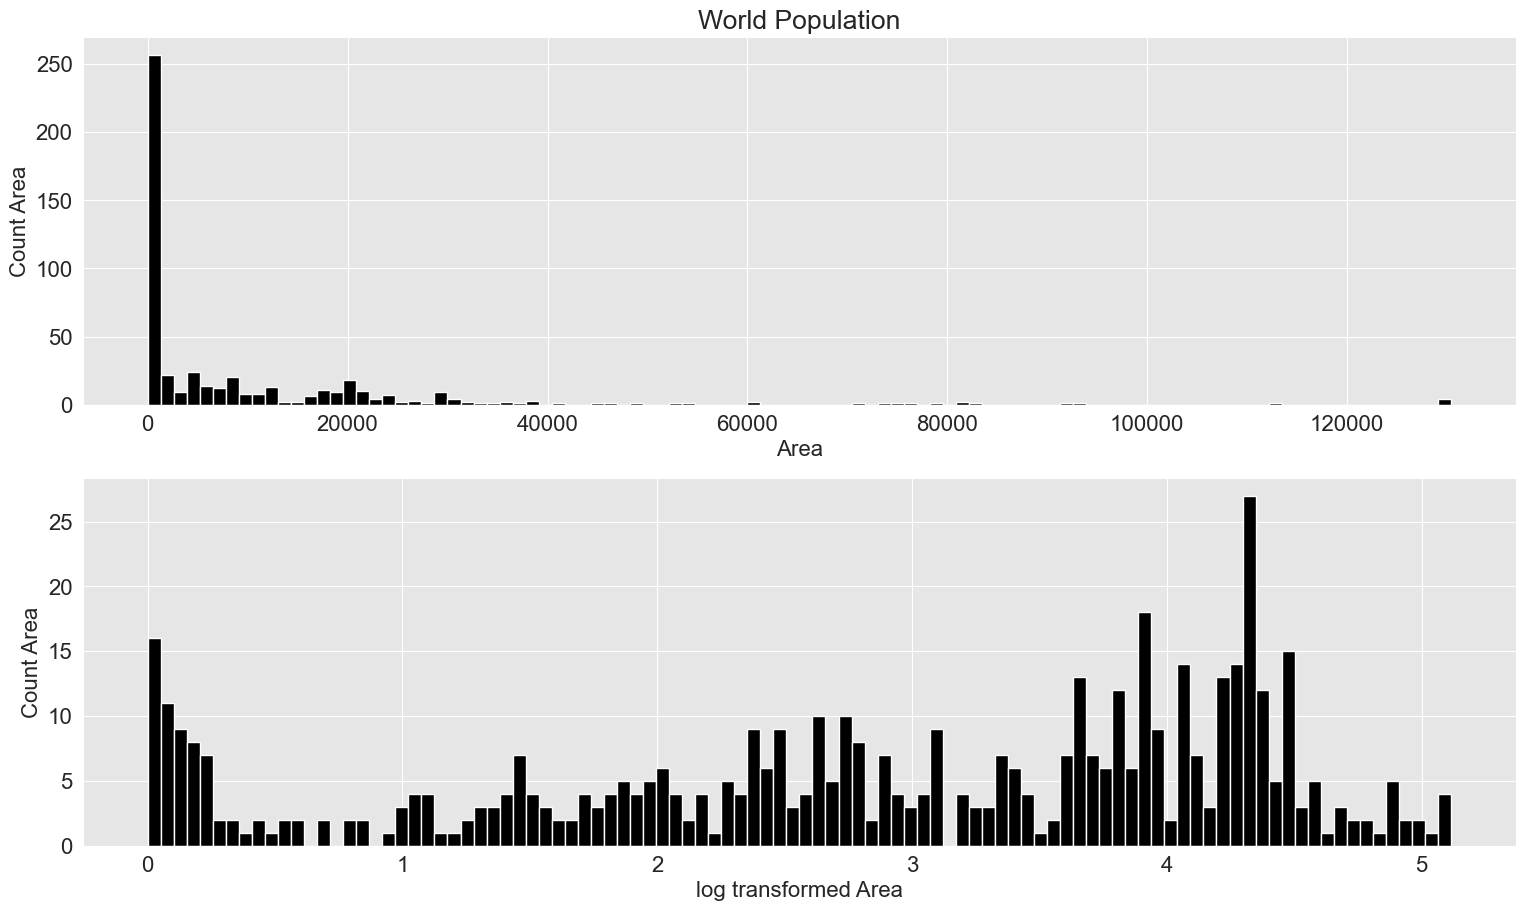

In [23]:
from scipy import stats
import seaborn as sns

def plot_transformer(chosen_dataset, chosen_transformation, chosen_feature = None, box_cox_lambda = 0):
    plt.rcParams['font.size'] = '16'
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    ##################################################################################################
    # choose dataset
    ##################################################################################################
    if chosen_dataset == "Online News Popularity":
        df = pd.read_csv("./datasets/OnlineNewsPopularity.csv")
        X_feature = " n_tokens_content"
    elif chosen_dataset == "World Population":
        df = pd.read_csv("./datasets/WPP2022_TotalPopulationBySex.csv")
        df = df[df["Time"]==2020]
        df["Area"] = df["PopTotal"] / df["PopDensity"]
        X_feature = "Area"
    elif chosen_dataset == "Housing Data":
        df = pd.read_csv("../datasets/HousingData.csv")
        X_feature = "AGE"
        
    # in case you want to plot the histogram for another feature
    if chosen_feature != None:
        X_feature = chosen_feature

    ##################################################################################################
    # choose type of transformation
    ##################################################################################################
    #chosen_transformation = "box-cox" #"log", "box-cox"

    if chosen_transformation == "log":
        def transform_feature(df, X_feature):
            # We add 1 to number_of_words to make sure we don't have a null value in the column to be transformed (0-> -inf) 
            return (np.log10(1+ df[[X_feature]]))
        
    elif chosen_transformation == "box-cox":
        def transform_feature(df, X_feature):
            return stats.boxcox(df[[X_feature]]+1, lmbda=box_cox_lambda)
            #return stats.boxcox(df[X_feature]+1)

    ##################################################################################################
    # plot histogram to chosen dataset and X_feature
    ##################################################################################################
    # figure settings
    fig, (ax1, ax2) = plt.subplots(2)
    fig.set_size_inches(18.5, 10.5)

    ax1.set_title(chosen_dataset)
    ax1.hist(df[[X_feature]], 100, facecolor='black', ec="white")
    ax1.set_ylabel(f"Count {X_feature}")
    ax1.set_xlabel(f"{X_feature}")

    print(df[X_feature].describe())

    ax2.hist(transform_feature(df, X_feature), 100, facecolor='black', ec="white")
    ax2.set_ylabel(f"Count {X_feature}")
    ax2.set_xlabel(f"{chosen_transformation} transformed {X_feature}")

    print("\n")
    print("="*50)
    print(transform_feature(df, X_feature).describe())

    fig.show()

plot_transformer(chosen_dataset = "World Population", chosen_transformation = "log")

In [36]:
from sklearn.datasets import make_circles
from sklearn import preprocessing
import plotly_express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.rcParams['font.size'] = '30'

# generate a data set
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X = preprocessing.scale(X)

X=X[500:]
y=y[500:]

# define target value, here: binary classification, class 1 or class 2
y=np.where(y==0,"class 1","class 2")

# define x1 and x2 of a 2-dimensional data set
x1 = X[:,0]
x2 = X[:,1]

import plotly_express as px
# define the kernel function
kernel = x1*x2 + x1**2 + x2**2

circle_df = pd.DataFrame(X).rename(columns={0:"x1", 1:"x2"})
circle_df = circle_df.assign(y=y)

color_discrete_map = {circle_df.y.unique()[0]: "black", circle_df.y.unique()[1]: "#f3d23a"}
px.scatter(circle_df, x="x1", y="x2", color="y", color_discrete_map = color_discrete_map, width=1000, height=800)

# plot the data set together with the kernel value in a 3-dimensional space
color_discrete_map = {circle_df.y.unique()[0]: "black", circle_df.y.unique()[1]: "grey"}
fig = px.scatter(circle_df, x="x1", y="x2", color="y", color_discrete_map = color_discrete_map, width=1000, height=600)
fig.update_layout(
    font=dict(
        family="Arial",
        size=24,  # Set the font size here
        color="Black"
    ),
    showlegend=True,
    width=1000,
    height=600,
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'y=class 2<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'class 2',
              'marker': {'color': 'black', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'class 2',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('S35taO8+gT+oUKpWvr7jv47kdBbe4N' ... 'gCSnS/zbusLGeC3j/xO32tcEPcvw=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('Qei7pL8i5T8wlVv7KgHRP1ET4ZnrAu' ... 'hSIdg/cL8aBhyI1j+LylragIfXPw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'y=class 1<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'class 1',
              'marker': {'color': 'grey', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'class 1',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('4F3JYAS7878uJf4BJ17nP3u50uWJI/' ... '0lQ/M+/z/rPwC3rOLcv1ltZ5M6aPe/'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('eOZ6It5Z9z9iyCp2FDn9v2W3bsfljP' ... 'cVU7+HwT8KRrxKOqf9vyOfWuFZs/Q/'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'font': {'color': 'Black', 'family': 'Arial', 'size': 24},
               'height': 600,
               'legend': {'title': {'text': 'y'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'showlegend': True,
               'template': '...',
               'width': 1000,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x1'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'x2'}}}
})

In [32]:
import plotly_express as px

# define the kernel function
kernel = x1*x2 + x1**2 + x2**2

kernel_df = pd.DataFrame(X).rename(columns={0:"x1", 1:"x2"})
kernel_df = kernel_df.assign(kernel=kernel)
kernel_df = kernel_df.assign(y=y)

# plot the data set together with the kernel value in a 3-dimensional space
color_discrete_map = {kernel_df.y.unique()[0]: "black", kernel_df.y.unique()[1]: "grey"}  
px.scatter_3d(kernel_df, x="x1", y="x2", z="kernel", color="y", width=1000, height=600)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'y=class 2<br>x1=%{x}<br>x2=%{y}<br>kernel=%{z}<extra></extra>',
              'legendgroup': 'class 2',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'class 2',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('S35taO8+gT+oUKpWvr7jv47kdBbe4N' ... 'gCSnS/zbusLGeC3j/xO32tcEPcvw=='),
                    'dtype': 'f8'},
              'y': {'bdata': ('Qei7pL8i5T8wlVv7KgHRP1ET4ZnrAu' ... 'hSIdg/cL8aBhyI1j+LylragIfXPw=='),
                    'dtype': 'f8'},
              'z': {'bdata': ('oyVALcxH3D8wz8RAd2TSP0hux2gLkO' ... 'i59cE/tWTLi9qb4D+5320Fc3vFPw=='),
                    'dtype': 'f8'}},
             {'hovertemplate': 'y=class 1<br>x1=%{x}<br>x2=%{y}<br>kernel=%{z}<extra></extra>',
              'legendgroup': 'class 1',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'class 1',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': {'bdata': ('4F3JYAS7878uJf4BJ17nP3u50uWJI/' ... '0lQ/M+/z/rPwC3rOLcv1ltZ5M6aPe/'),
                    'dtype': 'f8'},
              'y': {'bdata': ('eOZ6It5Z9z9iyCp2FDn9v2W3bsfljP' ... 'cVU7+HwT8KRrxKOqf9vyOfWuFZs/Q/'),
                    'dtype': 'f8'},
              'z': {'bdata': ('FDLFQWOd/T8uaPcsdUgEQIpRhPtbeP' ... 'ktZE5mEEAx+LFqZeYRQFlRg73fvf4/'),
                    'dtype': 'f8'}}],
    'layout': {'height': 600,
               'legend': {'title': {'text': 'y'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'x1'}},
                         'yaxis': {'title': {'text': 'x2'}},
                         'zaxis': {'title': {'text': 'kernel'}}},
               'template': '...',
               'width': 1000}
})

In [31]:
import nbformat
print(nbformat.__version__)


5.10.4


C:\Users\2389\AppData\Local\Temp\ipykernel_30700\3802531169.py:50: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



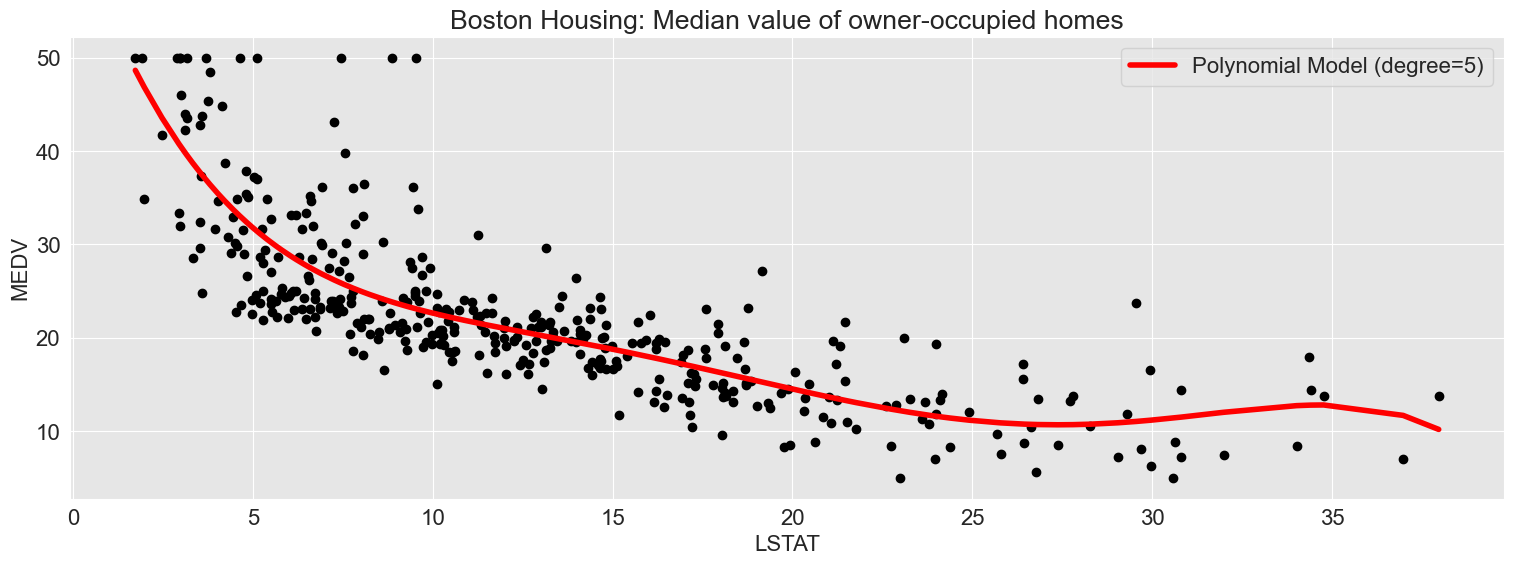

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# load data set: Boston Housing
boston_housing_df = pd.read_csv("./datasets/HousingData.csv")
boston_housing_df = boston_housing_df.dropna()
boston_housing_df = boston_housing_df.sort_values(by=["LSTAT"])

# define x and target variable y
X = boston_housing_df[["LSTAT"]]
y = boston_housing_df["MEDV"]

# fit model and create predictions
degree = 5
polynomial_features = PolynomialFeatures(degree=degree)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X, y)

y_pred = pipeline.predict(X)

# train linear model
regr = LinearRegression()
regr.fit(X,y)

# figure settings
fig, (ax1) = plt.subplots(1)
fig.set_size_inches(18.5, 6)

ax1.set_title("Boston Housing: Median value of owner-occupied homes")
ax1.scatter(X, y, c="black")
ax1.plot(X, y_pred, c="red", linewidth=4, label=f"Polynomial Model (degree={degree})")
ax1.set_ylabel(f"MEDV")
ax1.set_xlabel(f"LSTAT")
ax1.legend()

fig.show()

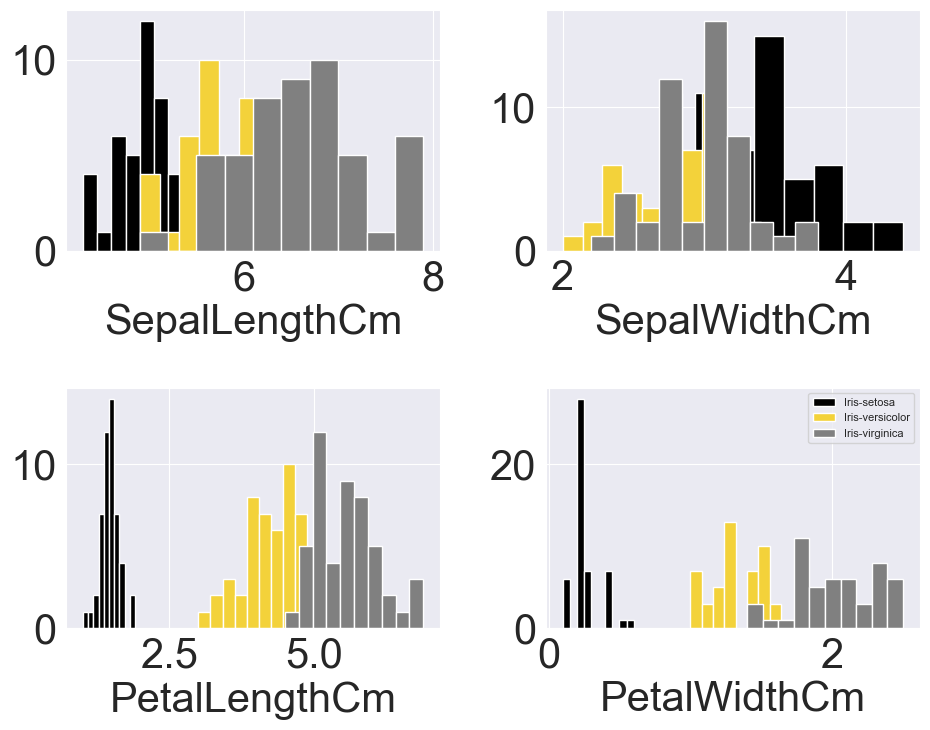

In [38]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv(r'./datasets/Iris.csv')
iris_data.dropna(how="all", inplace=True) # drops the empty line at file-end

sns.set_style("whitegrid")
colors = ["black", "#f3d23aff", "grey"]
plt.figure(figsize=(10, 8))

with sns.axes_style("darkgrid"):
    for cnt, column in enumerate(iris_data.columns[1:5]):
        plt.subplot(2, 2, cnt+1)
        for species_cnt, species in enumerate(iris_data.Species.unique()):
            plt.hist(iris_data[iris_data.Species == species][column], label=species, color=colors[species_cnt])

        plt.xlabel(column)
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [51]:
!pip install plotly

import plotly.io as pio
# Elige uno según tu entorno:
# pio.renderers.default = "notebook_connected"   # Jupyter clásico
# pio.renderers.default = "vscode"               # VS Code
pio.renderers.default = "browser"                # Siempre abre en el navegador

color_discrete_map = {iris_data.Species.unique()[0]: "black", iris_data.Species.unique()[1]: "#f3d23a", iris_data.Species.unique()[2]:"grey"}

px.scatter_3d(iris_data, x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm", color="Species", color_discrete_map = color_discrete_map, width=1000, height=800)

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
import plotly.graph_objects as go

# define X
X = iris_data[["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]]

# plot 2d plot
color_discrete_map = {iris_data.Species.unique()[0]: "black", iris_data.Species.unique()[1]: "#f3d23a", iris_data.Species.unique()[2]:"grey"}
fig = px.scatter(iris_data, x="PetalLengthCm", y="PetalWidthCm", color="Species", color_discrete_map = color_discrete_map)

fig.update_layout(
    font=dict(
        family="Arial",
        size=24,  # Set the font size here
        color="Black"
    ),
    showlegend=True,
    width=1200,
    height=800,
)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
import plotly.graph_objects as go

# define X
X = iris_data[["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]]

# fit PCA and transform X
pca = PCA(n_components=2).fit(X)
X_transform = pca.transform(X)
iris_data_trans = pd.DataFrame(X_transform).assign(Species = iris_data.Species).rename(columns={0:"PC1", 1:"PC2"})

# plot 2d plot
color_discrete_map = {iris_data.Species.unique()[0]: "black", iris_data.Species.unique()[1]: "#f3d23a", iris_data.Species.unique()[2]:"grey"}
fig = px.scatter(iris_data_trans, x="PC1", y="PC2", color="Species", color_discrete_map = color_discrete_map)

fig.update_layout(
    font=dict(
        family="Arial",
        size=24,  # Set the font size here
        color="Black"
    ),
    showlegend=True,
    width=1200,
    height=800,
)

In [54]:
print("Varianza explicada:", pca.explained_variance_ratio_)
print("Varianza total explicada:", pca.explained_variance_ratio_.sum())


Varianza explicada: [0.92461621 0.05301557]
Varianza total explicada: 0.9776317750248054


In [55]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=X.columns
)
print(loadings)


                    PC1       PC2
PetalLengthCm  0.856572 -0.175767
PetalWidthCm   0.358844 -0.074706
SepalLengthCm  0.361590  0.656540
SepalWidthCm  -0.082269  0.729712


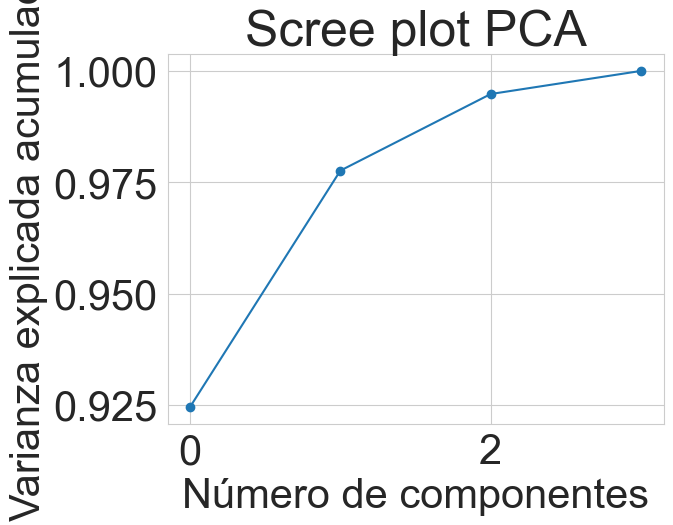

In [56]:
pca_full = PCA().fit(X)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker="o")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Scree plot PCA")
plt.grid(True)
plt.show()


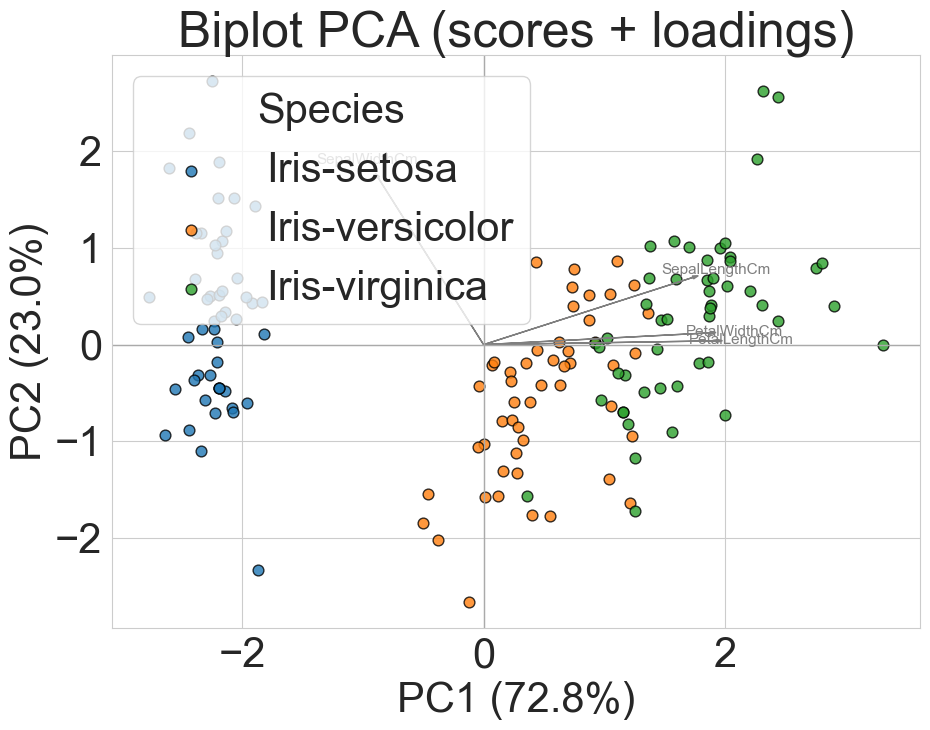

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# --- Datos: usa tus columnas numéricas del iris ---
X = iris_data[["PetalLengthCm", "PetalWidthCm", "SepalLengthCm", "SepalWidthCm"]].copy()
y = iris_data["Species"].astype(str).values

# 1) Estandarizar
Z = StandardScaler().fit_transform(X)

# 2) PCA (2 componentes)
pca = PCA(n_components=2).fit(Z)
scores = pca.transform(Z)                        # coordenadas de las muestras (PC space)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)  # vectores de variables

# 3) Escalado de flechas para que quepan en la figura
#    (ajustamos flechas a ~60% del rango de los scores)
scale = 0.6 * np.max(np.abs(scores))
max_loading = np.max(np.sqrt((loadings**2).sum(axis=1)))
loadings_scaled = loadings / max_loading * scale

# 4) Plot
plt.figure(figsize=(10,8))

# puntos por especie
for sp in np.unique(y):
    mask = (y == sp)
    plt.scatter(scores[mask, 0], scores[mask, 1], s=60, edgecolor="k", alpha=0.8, label=sp)

# flechas (variables)
for i, var in enumerate(X.columns):
    x0, y0 = 0, 0
    x1, y1 = loadings_scaled[i, 0], loadings_scaled[i, 1]
    plt.arrow(x0, y0, x1, y1, color="tab:gray", width=0.0, head_width=0.08*scale/5, length_includes_head=True)
    plt.text(x1*1.08, y1*1.08, var, fontsize=11, ha="center", va="center", color="tab:gray")

# ejes y leyenda
expl = pca.explained_variance_ratio_ * 100
plt.xlabel(f"PC1 ({expl[0]:.1f}%)")
plt.ylabel(f"PC2 ({expl[1]:.1f}%)")
plt.axhline(0, color="#aaa", lw=1)
plt.axvline(0, color="#aaa", lw=1)
#plt.legend(title="Species")
plt.title("Biplot PCA (scores + loadings)")
plt.tight_layout()
plt.show()
